## Selection, Highlighting, and Linked Highlighting

* Author: David Koop
* Last Updated: 2025-04-11

### Vega-Altair

In this courselet, we will be using the Vega-Altair module. Make sure you have installed it before starting this courselet. You will also need the pandas and geopandas modules to load the data. Using pip, use
```
pip install altair pandas geopandas
```
With conda, use
```
conda install -c conda-forge altair pandas geopandas
```

[Vega-Altair](https://altair-viz.github.io) is a Python visualization library that leverages the [Vega-Lite](https://vega.github.io/vega-lite/) grammar written in JavaScript. It allows creators to use declarative specifications written in JSON to produce visualizations and specify how interaction is handled. In general, Vega-Altair produces the JSON specification in Python and passes it to Vega-Lite to render.

### Selection

While visualization can produce static plots, allowing viewers to interactively explore the data requires creators to consider how plots may change in reaction to events. The core sequence we are concerned with is allowing users to select one or more data items and taking some action related to that selection. Selecting a single item requires the viewer to indicate the item; commonly, this is accomplished by moving the mouse cursor atop the item or touching the item on a touchscreen, but could also be accomplished by tracking the viewers eyes. Often, this type of selection is built-in to user interfaces. If you hover over a button or other element, you may see a **tooltip** that provides some information about the item. 

In the following examples, we will use bird species' data from Table 10 of the paper "Wing Length as an Indicator of Weight: A Contribution" [1]. It contains the bird's common name, scientific name, wing length, and weight. The scatterplot encodes the bird species' average wing length and weight as x- and y-position, but it also adds a tooltip encoding. When you move the pointer over one of the points, it will show the bird's common name. This is an example of providing **details-on-demand**.

[1] Rand, A. L. "Wing Length as an Indicator of Weight: A Contribution." Bird-Banding 32, no. 2 (1961): 71–79. https://doi.org/10.2307/4510860.

In [1]:
import pandas as pd
birds = pd.read_csv('birds.csv').query('`Common Name` != "American Crow"')
birds

,Common Name,Species,Wing Length,Weight
0,House Wren,Troglodytes aedon,51.0,11.0
1,Golden-crowned Kinglet,Regulus satrapa,56.0,5.7
2,Swamp Sparrow,Melospiza georgiana,62.0,17.0
3,Chestnut-sided Warbler,Setophaga pensylvanica,62.0,11.1
4,Blue-headed Vireo,Vireo solitarius,75.0,16.5
5,White-crowned Sparrow,Zonotrichia leucophrys,75.0,26.5
6,Gray Catbird,Dumetella carolinensis,88.0,39.0
7,Cedar Waxwing,Bombycilla cedrorum,95.0,25.0
8,Rose-breasted Grosbeak,Pheucticus ludovicianus,101.0,40.0
9,Florida Scrub-Jay,Aphelocoma coerulescens,115.0,78.0


In [2]:
import altair as alt

alt.Chart(birds).mark_point(filled=True, stroke='black').encode(
    x='Weight',
    y='Wing Length',
    color=alt.value("gray"),
    strokeWidth=alt.value(1),
    size=alt.value(100),
    tooltip="Common Name"
)

alt.Chart(...)

This works if all we want to show is a single text box with information about the currently selected point, but this is a bit limited. In order to support a wider set of possibilites related to selected points, we can create a selection that is tied to the plot. Vega-Altair's `selection_single` allows a user to select a single point using a pointer click. Selecting a point deselects any previously selected point. The below code allows a user to select a point in this way. Try clicking a point to select it.

In [5]:
import altair as alt

selector = alt.selection_point()

c = alt.Chart(birds).mark_point(filled=True, stroke='black').encode(
    x='Weight',
    y='Wing Length',
    color=alt.value("gray"),
    strokeWidth=alt.value(1),
    size=alt.value(100),
).add_params(
    selector
)
c

alt.Chart(...)

### Highlighting

You may think that the above example is broken, but is working. The problem is that there is no **feedback** that lets you know which point was selected! The encoding of this feedback is called **highlighting**. We may highlight by changing the color of the point, changing the width of the stroke, or even change the size of the point. To implement this, we need to property to change based on a **condition**. Altair-Vega's `condition` construct takes the selector as the first argument, and the next two arguments are the value when selected and the value when unselected, respectively. Updating our example, we see that clicking on a point now changes it to a red color. (The `empty='none'` keyword argument sets the empty selection to no points; by default `empty` is `'all'` which selects *all* values.)

In [6]:
import altair as alt

selector = alt.selection_point(empty='none')

alt.Chart(birds).mark_point(filled=True, stroke='black').encode(
    x='Weight',
    y='Wing Length',
    color=alt.condition(selector, alt.value('red'), alt.value('gray')),
    strokeWidth=alt.value(1),
    size=alt.value(100),
).add_params(
    selector
)

alt.Chart(...)

In [7]:
import altair as alt

selector = alt.selection_point(empty='none')

alt.Chart(birds).mark_point(filled=True, stroke='black').encode(
    x='Weight',
    y='Wing Length',
    color=alt.condition(selector, alt.value('red'), alt.value('gray')),
    strokeWidth=alt.condition(selector, alt.value(3), alt.value(1)),
    size=alt.value(100),
).add_params(
    selector
)

alt.Chart(...)

#### Exercise

Update the plot below to change the size of the currently selected point to 150.

In [9]:
import altair as alt

selector = alt.selection_point(empty='none')

alt.Chart(birds).mark_point(filled=True, stroke='black').encode(
    x='Weight',
    y='Wing Length',
    color=alt.condition(selector, alt.value('red'), alt.value('gray')),
    strokeWidth=alt.condition(selector, alt.value(3), alt.value(1)),
    size=alt.value(100),
).add_params(
    selector
)

alt.Chart(...)

##### Solution

In [10]:
import altair as alt

selector = alt.selection_point(empty='none')

alt.Chart(birds).mark_point(filled=True, stroke='black').encode(
    x='Weight',
    y='Wing Length',
    color=alt.condition(selector, alt.value('red'), alt.value('gray')),
    strokeWidth=alt.condition(selector, alt.value(3), alt.value(1)),
    size=alt.condition(selector, alt.value(150), alt.value(100)),
).add_params(
    selector
)

alt.Chart(...)

### Hover Selection

In the above example, selection is accomplished by clicking a point. However, there are other methods of accomplishing this selection. We might wish to have the same type of selection used with tooltips, selecting a point when the pointer is over the point, without requiring a click. We can set the `on` parameter to `'pointerover'` instead.

In [13]:
import altair as alt

selector = alt.selection_point(on='pointerover', empty='none')

alt.Chart(birds).mark_point(filled=True, stroke='black').encode(
    x='Weight',
    y='Wing Length',
    color=alt.condition(selector, alt.value('red'), alt.value('gray')),
    strokeWidth=alt.condition(selector, alt.value(3), alt.value(1)),
    size=alt.value(100),
).add_params(
    selector
)

alt.Chart(...)

### Multipe Selection

The above works well if we only want to select a single point, but we can also select multiple points by holding the `Shift` key to allow the user to select multiple points. Note that in current versions of altair, this requires no changes to the code. (In the past, there was a distinction between 'single' and 'multi' selection, but they have been combined into the 'point' selection.) Try selecting multiple points using the `Shift` key.

In [15]:
import altair as alt

selector = alt.selection_point(empty='none')

alt.Chart(birds).mark_point(filled=True, stroke='black').encode(
    x='Weight',
    y='Wing Length',
    color=alt.condition(selector, alt.value('red'), alt.value('gray')),
    strokeWidth=alt.condition(selector, alt.value(3), alt.value(1)),
    size=alt.value(100),
).add_params(
    selector
)

alt.Chart(...)


In the second type of selection, we might allow the user to select a region by, for example, dragging a rectangle, but this makes the selection **contiguous**, meaning all the points in the region will be selected and you cannot skip over some. Vega-Altair implements this type of selection as a `selection_interval`.

In [16]:
import altair as alt

selector = alt.selection_interval(empty='none')

alt.Chart(birds.iloc[:-1]).mark_point(filled=True, stroke='black').encode(
    x='Weight',
    y='Wing Length',
    color=alt.condition(selector, alt.value('red'), alt.value('gray')),
    strokeWidth=alt.condition(selector, alt.value(3), alt.value(1)),
    size=alt.value(100),
).add_params(
    selector
)

alt.Chart(...)

### Brushing (Linked Highlighting)

While highlighting in a single plot may look cool, it isn't really helping us analyze anything. Where selection and highlighting becomes useful in a purely visual context is when marks in one visualization can be linked with marks in another so we can examine how groups of points change or vary according to different examiniations. For example, with our bird data, we might be interested in the range of the birds in the continental United States. Then, when we select a bird in the scatterplot, we can show the region that bird is found in on a map. Not only is there highlighting in the scatterplot, but we will highlight the region where the bird is found on the map (the linked highlighting). The range maps are derived from data produced by the [eBird Status and Trends Project](https://ebird.org/science/status-and-trends) [2] at the [Cornell Lab of Ornithology](https://www.birds.cornell.edu/).

In the example below, we will combine our scatterplot with a map visualization that shows the ranges of the birds in the continental United States. Here, the selected data item is used to filter all of the range maps to show only the one related to the selected bird species. In order to generate multiple views in one visualization, we first create multiple Vega-Altair charts and then combine them using concatentation and layering. In this case, we use our scatterplot with mouseover selection, and then create a `base_map` visualization that shows the outline of the continental United States. The `range_map` visualization shows the outlines of the species' ranges. If we display all ranges at once, we would not be able to differentiate the individual species, but by using the `transform_filter` only the selected species' range is shown. Then, we layer the `range_map` atop the `base_map` using the `+` layering operator, and concatenate the layered map with the scatterplot using the horizontal concatenation operator (`|`).

[2] Fink, D., T. Auer, A. Johnston, M. Strimas-Mackey, S. Ligocki, O. Robinson, W. Hochachka, L. Jaromczyk, A. Rodewald, C. Wood, I. Davies, A. Spencer. 2022. eBird Status and Trends, Data Version: 2021; Released: 2022. Cornell Lab of Ornithology, Ithaca, New York. https://doi.org/10.2173/ebirdst.2021

In [17]:
import geopandas as gpd
import altair as alt

bird_ranges = gpd.read_file('bird-ranges.geojson')
merged = bird_ranges.merge(birds, left_on='scientific_name', right_on='Species')

,species_code,scientific_name,common_name,geometry,Common Name,Species,Wing Length,Weight
0,purmar,Progne subis,Purple Martin,"MULTIPOLYGON (((-70.09056 44.5543, -69.64197 4...",Purple Martin,Progne subis,142.0,43.0
1,flsjay,Aphelocoma coerulescens,Florida Scrub-Jay,"POLYGON ((-82.33815 29.69661, -81.98625 29.979...",Florida Scrub-Jay,Aphelocoma coerulescens,115.0,78.0
2,whcspa,Zonotrichia leucophrys,White-crowned Sparrow,"MULTIPOLYGON (((-124.72821 48.3603, -123.92679...",White-crowned Sparrow,Zonotrichia leucophrys,75.0,26.5
3,grycat,Dumetella carolinensis,Gray Catbird,"MULTIPOLYGON (((-122.42468 45.77741, -121.9680...",Gray Catbird,Dumetella carolinensis,88.0,39.0
4,cedwax,Bombycilla cedrorum,Cedar Waxwing,"POLYGON ((-124.72821 48.3603, -123.92679 48.16...",Cedar Waxwing,Bombycilla cedrorum,95.0,25.0
5,robgro,Pheucticus ludovicianus,Rose-breasted Grosbeak,"MULTIPOLYGON (((-119.6911 38.32942, -119.43636...",Rose-breasted Grosbeak,Pheucticus ludovicianus,101.0,40.0
6,blujay,Cyanocitta cristata,Blue Jay,"MULTIPOLYGON (((-120.80237 46.73976, -118.1310...",Blue Jay,Cyanocitta cristata,134.0,89.0
7,houwre,Troglodytes aedon,House Wren,"MULTIPOLYGON (((-124.37703 42.68403, -124.1511...",House Wren,Troglodytes aedon,51.0,11.0
8,easmea,Sturnella magna,Eastern Meadowlark,"MULTIPOLYGON (((-113.30946 34.23705, -113.3198...",Eastern Meadowlark,Sturnella magna,122.4,145.0
9,chswar,Setophaga pensylvanica,Chestnut-sided Warbler,"MULTIPOLYGON (((-106.51122 48.16451, -105.9456...",Chestnut-sided Warbler,Setophaga pensylvanica,62.0,11.1


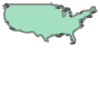

In [21]:
usstdf = gpd.read_file('cb_2021_us_state_5m/cb_2021_us_state_5m.shp')
cont_us = usstdf[~usstdf.NAME.isin(['Puerto Rico','Guam','American Samoa','Commonwealth of the Northern Mariana Islands', 'United States Virgin Islands','Alaska','Hawaii'])].geometry.union_all()

In [19]:
import altair as alt

selector = alt.selection_point(on='pointerover', empty='none')

scatter = alt.Chart(merged).mark_point(filled=True, size=100, stroke='black').encode(
    x='Weight',
    y='Wing Length',
    color=alt.condition(selector, alt.value('red'), alt.value('gray')),
    strokeWidth=alt.condition(selector, alt.value(3), alt.value(1)),
    size=alt.value(100),
).add_params(
    selector
)

base_map = alt.Chart(cont_us).mark_geoshape(
    fill='lightgray',
    stroke='black',
    opacity=0.6
).project('albersUsa')

range_map = alt.Chart(merged).mark_geoshape().encode(
    fill=alt.value('red'),
    stroke=alt.value('white'),
    opacity=alt.value(0.6)
).project('albersUsa').transform_filter(
    selector
)

scatter | (base_map + range_map)


alt.HConcatChart(...)

#### Exercises

1. Allow multiple species to be selected and show all of their ranges.
2. Update Part 1 so that each range is shown using a different color.
2. Calculate which species appear in which states (geopandas has operations to intersect the range with the states), and then create a multiple view visualization that allows a user to highlight a state and uses linked highlighting to highlight the birds in the scatterplot that inhabit that state.

##### Solutions

In [20]:
import altair as alt

selector = alt.selection_point(empty='none')

scatter = alt.Chart(merged).mark_point(filled=True, size=100, stroke='black').encode(
    x='Weight',
    y='Wing Length',
    color=alt.condition(selector,'common_name:N', alt.value('gray')),
    strokeWidth=alt.condition(selector, alt.value(3), alt.value(1)),
    size=alt.value(100),
).add_params(
    selector
)

base_map = alt.Chart(cont_us).mark_geoshape(
    fill='lightgray',
    stroke='black',
    opacity=0.6
).project('albersUsa')

range_map = alt.Chart(merged).mark_geoshape().encode(
    color='common_name:N',
    stroke=alt.value('white'),
    opacity=alt.value(0.6)
).transform_filter(
    selector
)

scatter | (base_map + range_map)


alt.HConcatChart(...)